In [1]:
# imports here!

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
from scipy import signal
import math
import cv2
import cmath

PI = np.pi ## denoting common constants..                            
exp = np.e  

In [2]:
class kernels(object):
    
    def __init__(self):
        pass
    
    def centered_2d_diff(self):
        x_filter = np.array([[-0.5,0,0.5]])
        y_filter= x_filter.T
        
        return x_filter,y_filter
    
    def roberts_oper(self):
        x_filter = np.array([[-1 ,0],[0, 1]])
        y_filter = np.array([[0 ,-1],[1, 0]])
        
        return x_filter, y_filter
    
    def prewitt_oper(self):
        x_filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
        y_filter = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
        
        return x_filter/3., y_filter/3.
    
    def sobel_oper(self):
        x_filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
        y_filter = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
        
        return x_filter/4.,y_filter/4. 
    
    def laplacian(self):
        _filter =  np.array([[0,1,0],[1,-4,1],[0,1,0]])
        return _filter
        
    


In [13]:
class estimates(object):
    def __init__(self,Mx,My):
        self.Mx = Mx
        self.My = My
        
    def root_square(self):
        return ( (self.Mx)**2 + (self.My)**2 )**0.5
    
    def sum_of_absolutes(self):
        return (np.abs(self.Mx) + np.abs(self.My))
    
    def max_of_absolutes(self):
        return np.maximum(np.abs(self.Mx), np.abs(self.My))
        

<class 'numpy.ndarray'>


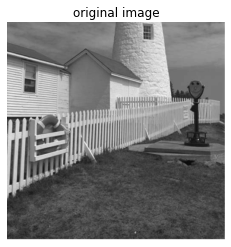

In [9]:

class image :

    def disp_img(self, I, title = None): # A utility func for displaying images 
        plt.imshow(I, cmap = 'gray')
        plt.axis('off')
        plt.title(title)
        plt.show()

    ##### -------------------- Common code for Both 2 & 3 reading and displaying images ---#
    def __init__ (self, path, display = False):
        self.path = path
        self.I = cv2.imread(self.path, cv2.IMREAD_GRAYSCALE) ## Reading the contents of the image I 
        if(display): ## Displaying I
            self.disp_img(self.I)
            
    def threshold(self,M, thresh, display=False, title =None):
        M[M>= thresh] = 255
        M[M< thresh] = 0

        if(display):
            self.disp_img(M,title)
            



img = image('lighthouse.png')

I = img.I
print(type(I))

img.disp_img(I, title = 'original image')

In [4]:


class conv_oper:
    def __init__(self):
        pass

    
    def zero_padding(self, I, target_shape):
        J = np.zeros(target_shape)
        ### padding zeros at the bottom right 
        J[0:I.shape[0],0:I.shape[1]] = I[0:I.shape[0],0:I.shape[1]]
        return J
    #### Question 1.b --> Matrix approach 
    ##########################################################################################
    def find_DFT(self, I): ### funct to compute DFT using matrix approach
        
        self.J = I.copy()
        N = self.J.shape[0]
        self.DFT = np.zeros((N,N), dtype = complex)
        
        phase =  -1*(2*PI)/N
        w = cmath.rect(1,phase)
        W = np.array([[ w**(i*j) for j in range(N)]for i in range(N)] ,dtype = complex) # Complex exponential matrix

        self.DFT = W@self.J@W
        return self.DFT
    
    
    def find_IDFT(self, I): ### finding IDFT using matrix approach
        self.J = I
        N = self.J.shape[0]
        self.IDFT = np.zeros((N,N), dtype = complex)
        
        phase =  -1*(2*PI)/N
        w = cmath.rect(1,phase)
        W = np.array([[ w**(i*j) for j in range(N)]for i in range(N)] ,dtype = complex) # Complex exponential matrix

        W_inv = (1/N) * np.conjugate(W)
        
        self.IDFT = W_inv@self.J@W_inv
        self.IDFT = np.round(abs(self.IDFT))
        self.IDFT = np.array(self.IDFT)
        
        return self.IDFT
    
    ### Padded and computing IDFT( DFT(I). DFT(F))
    def linear_conv_with_DFT(self, I, F):
        N,M = I.shape

        P,P  = F.shape
        
        #### Padding both images..
        I = self.zero_padding(I,(N+P-1,M+P-1))
        F = self.zero_padding(F,(N+P-1,M+P-1))
        
        I_DFT = self.find_DFT(I)
        F_DFT = self.find_DFT(F)
        
        J = np.multiply(I_DFT, F_DFT, dtype= complex)
        
        J_IDFT = self.find_IDFT(J)
        J_cropped = J_IDFT[0:N,0:N]
        
        return J_IDFT, J_cropped

### Using "centered 2d Differencing" kernel with different estimations

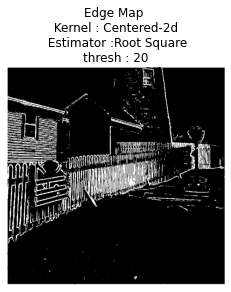

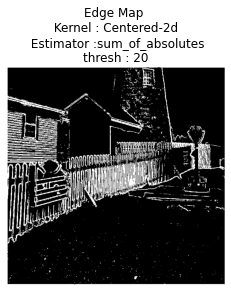

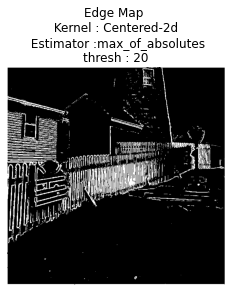

In [68]:
Fx,Fy = kernels().centered_2d_diff()


_,Mx = conv_oper().linear_conv_with_DFT(I,Fx)
_,My = conv_oper().linear_conv_with_DFT(I,Fy)


## a)
M1 = estimates(Mx,My).root_square()
title = 'Edge Map \n Kernel : Centered-2d \n Estimator :Root Square\n'
img.threshold(M1, thresh=20, display=True, title = title + str('thresh : {}'.format(20)))


## b)
M2 = estimates(Mx,My).sum_of_absolutes()
title = 'Edge Map \n Kernel : Centered-2d \n Estimator :sum_of_absolutes\n'
img.threshold(M2, thresh=20, display=True, title = title + str('thresh : {}'.format(20)))

## c)
M3 = estimates(Mx,My).max_of_absolutes()
title = 'Edge Map \n Kernel : Centered-2d \n Estimator :max_of_absolutes\n'
img.threshold(M3, thresh=20, display=True, title = title + str('thresh : {}'.format(20)))



### Using "Roberts" kernel with different estimations

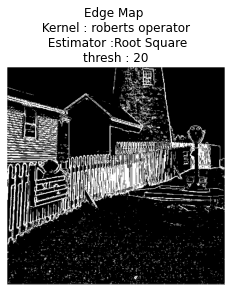

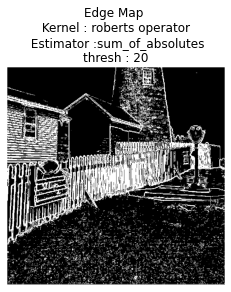

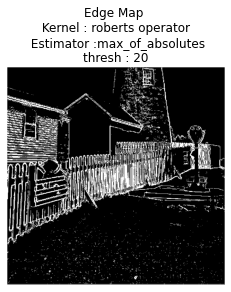

In [73]:
Fx,Fy = kernels().roberts_oper()


_,Mx = conv_oper().linear_conv_with_DFT(I,Fx)
_,My = conv_oper().linear_conv_with_DFT(I,Fy)


## a)
M1 = estimates(Mx,My).root_square()
title = 'Edge Map \n Kernel : roberts operator \n Estimator :Root Square\n'
img.threshold(M1, thresh=20, display=True, title = title + str('thresh : {}'.format(20)))


## b)
M2 = estimates(Mx,My).sum_of_absolutes()
title = 'Edge Map \n Kernel : roberts operator \n Estimator :sum_of_absolutes\n'
img.threshold(M2, thresh=20, display=True, title = title + str('thresh : {}'.format(20)))

## c)
M3 = estimates(Mx,My).max_of_absolutes()
title = 'Edge Map \n Kernel : roberts operator \n Estimator :max_of_absolutes\n'
img.threshold(M3, thresh=20, display=True, title = title + str('thresh : {}'.format(20)))



### Using "Prewitt" kernel with different estimations

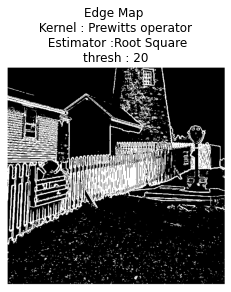

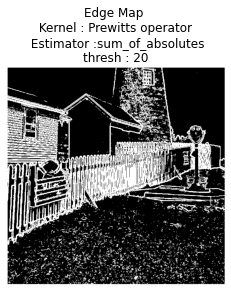

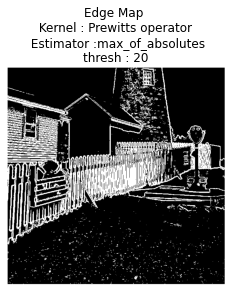

In [74]:
Fx,Fy = kernels().prewitt_oper()


_,Mx = conv_oper().linear_conv_with_DFT(I,Fx)
_,My = conv_oper().linear_conv_with_DFT(I,Fy)


## a)
M1 = estimates(Mx,My).root_square()
title = 'Edge Map \n Kernel : Prewitts operator \n Estimator :Root Square\n'
img.threshold(M1, thresh=20, display=True, title = title + str('thresh : {}'.format(20)))


## b)
M2 = estimates(Mx,My).sum_of_absolutes()
title = 'Edge Map \n Kernel : Prewitts operator \n Estimator :sum_of_absolutes\n'
img.threshold(M2, thresh=20, display=True, title = title + str('thresh : {}'.format(20)))

## c)
M3 = estimates(Mx,My).max_of_absolutes()
title = 'Edge Map \n Kernel : Prewitts operator \n Estimator :max_of_absolutes\n'
img.threshold(M3, thresh=20, display=True, title = title + str('thresh : {}'.format(20)))



### Using "Sobel" kernel with different estimations

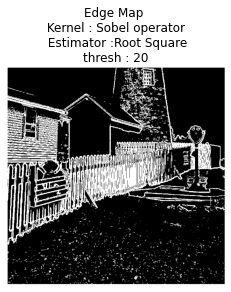

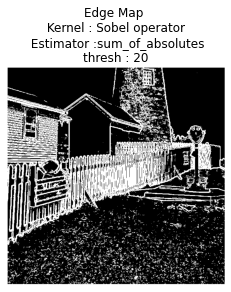

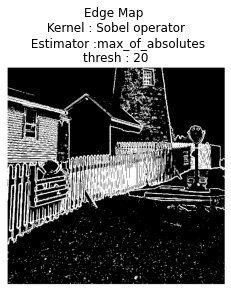

In [76]:
Fx,Fy = kernels().sobel_oper()


_,Mx = conv_oper().linear_conv_with_DFT(I,Fx)
_,My = conv_oper().linear_conv_with_DFT(I,Fy)


## a)
M1 = estimates(Mx,My).root_square()
title = 'Edge Map \n Kernel : Sobel operator \n Estimator :Root Square\n'
img.threshold(M1, thresh=20, display=True, title = title + str('thresh : {}'.format(20)))


## b)
M2 = estimates(Mx,My).sum_of_absolutes()
title = 'Edge Map \n Kernel : Sobel operator \n Estimator :sum_of_absolutes\n'
img.threshold(M2, thresh=20, display=True, title = title + str('thresh : {}'.format(20)))

## c)
M3 = estimates(Mx,My).max_of_absolutes()
title = 'Edge Map \n Kernel : Sobel operator \n Estimator :max_of_absolutes\n'
img.threshold(M3, thresh=20, display=True, title = title + str('thresh : {}'.format(20)))



# Prob: 3.2 : Using the laplacian Edge detector

In [12]:
I = img.I.astype(np.float64)
F = kernels().laplacian()
_,M = conv_oper().linear_conv_with_DFT(I,F)

In [15]:
print(M)

[[  0. 114. 113. ... 135. 136. 138.]
 [114. 231. 115. ... 131. 131.  64.]
 [112. 110.   5. ...   1.   2.  61.]
 ...
 [ 70.  58. 137. ... 153. 158. 263.]
 [209. 303.  96. ...  94.  98.  62.]
 [255. 301.  47. ...  47.  47.  48.]]


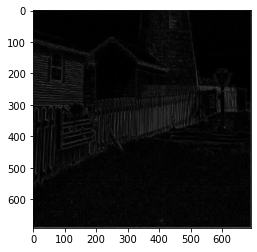

In [13]:
plt.imshow(M,cmap='gray')

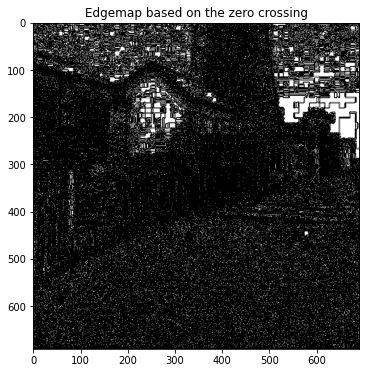

In [34]:


edgemap = np.zeros(M.shape)
edgemap[M==0] = 1
plt.figure(figsize=(10,6))
plt.imshow(edgemap,cmap="gray")
plt.title("Edgemap based on the zero crossing")
plt.show()

In [16]:
# Metric - Mean Absolute distance
def MAD(image_1,image_2):
    return (np.sum(abs(image_1-image_2)))/(image_1.shape[0]*image_1.shape[1])

#DFT calculation using matrix multiplication
def dft_b(image,plot=False):
    img = image[:,:]
    N = img.shape[0]
    wn = np.exp(-2j*np.pi/N)          #Initiating the transform matrix
    W_N = np.ones((N,N),dtype=complex)
    for i in range(1,N):              #Writing values of the DFT matrix
        for j in range(i,N):
            W_N[i,j] = np.power(wn,i*j)
            W_N[j,i]=W_N[i,j]
    # I_ hat = W*I*W
    img_tilde = np.dot(np.dot(W_N,img),W_N)
#     print(img_tilde)
    #Plot
    if plot:
        plt.figure(figsize=(10,10))
        plt.subplot(2,2,1)
        plt.imshow(img,cmap="gray")
        plt.title("Image (I)")
        plt.subplot(2,2,2)
        plt.imshow(np.absolute(img_tilde),cmap="gray")
        plt.title("Magnitude of DFT (|$\~I$|)")
        plt.subplot(2,2,3)
        plt.imshow(np.angle(img_tilde),cmap="gray")
        plt.title("Phase $(∠ \~I)$")
        plt.subplot(2,2,4)
        plt.imshow(FSCS(np.log(1+np.absolute(img_tilde))),cmap="gray")
        plt.title("Logarithmic Tranform (log(1+|$\~I$|))")
        plt.show()
    return img_tilde
#Calculating the inverse transform
def idft(dft):
    img_t = dft
    N = img_t.shape[0]
    wn = np.exp(-2j*np.pi/N)          #Initiating the transform matrix
    W_N = np.ones((N,N),dtype=complex)
    for i in range(1,N):              #Writing values of the DFT matrix
        for j in range(i,N):
            W_N[i,j] = np.power(wn,i*j)
            W_N[j,i]=W_N[i,j]
    #Calculating the inverse W, which is its conjugate divided by N
    W_Ninv = np.linalg.inv(W_N)
    # I = WN^-1.I_hat.WN^-1
    img = np.dot(np.dot(W_Ninv,img_t),W_Ninv)
    img = np.clip(np.real(img), 0, 255)
    return img
#Function for finding the linear convolution using the DFT
def linearConvDFT(img,kernel,plot=False):
    N,M = img.shape                           #Image Shape
    Nk,Mk = kernel.shape                      #Kernel Shape
    padImage = np.zeros((N+N,M+M))          #Padding the Image to the sum of dimensions of image and kernel
    padImage[:N,:M] = img                   
    padKernel = np.zeros((N+N,M+M))         #Padding the kernel to the sum of dimensions of image and kernel
    padKernel[:Nk,:Mk] = kernel
    imgDFT = dft_b(padImage)                  #Image DFT
    kernelDFT = dft_b(padKernel)              #Kernel DFT
    resDFT = np.multiply(imgDFT,kernelDFT)    #Product of DFTs
    resImg = idft(resDFT)                     #Resulatant image from the IDFT
    #Extracting the centre image from the pad
    resImg = resImg[((Nk-1)//2):N+((Nk-1)//2),((Mk-1)//2):M+((Mk-1)//2)]
    #Plot
    if plot:
        plt.figure(figsize=(10,6))
        plt.subplot(1,2,1)
        plt.imshow(img,cmap="gray")
        plt.title("Original Image")
        plt.subplot(1,2,2)
        plt.imshow(resImg,cmap="gray")
        plt.title("Linearly Convolved Image using DFT")
        plt.show()
    return resImg
#Generic Gaussian filter function
def gaussianFilter(N=10,sigma=0.5):      
    H = np.zeros((N,N))
    centre = N//2
    for u in range(N):
        for v in range(N):
            H[u,v] = np.exp(-(2*(np.pi**2)*(sigma**2))*((u-centre)**2 + (v-centre)**2)/(N**2)) #Gaussian Function
    H[:,:] = H[:,:]/np.sum(H[:,:])
    return H
#Function which return N size average filter
def avgFilter(n):                              
    return (1/np.power(n,2))*np.ones((n,n))
#Function that adds gaussion noise
def addGaussianNoise(img,mean=0,var=1):
    N,M = img.shape                           #Image Shape
    sigma = np.sqrt(var)                      #Standard Deviation for AWGN
    noise = np.random.normal(mean,sigma,(N,M))#Noise
    J = img + noise                           #Noisy Image
    J[J<0] = 0                                #Clipping the image 
    J[J>255]=255
    return J
#Linear Image filtering using Gaussian Filter
def Blurring(img):
    res = linearConvDFT(img,gaussianFilter())
    return res
#Binarize
def BinarizationImg(img,threshold,plot=True):
    print("Threshold Used : "+str(threshold))   #Threshold utilised
    cimg = img.copy()                           #Copying the data for editing
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i][j]>=threshold):           #Applying grey level 1 for greater threshold pixel
                cimg[i][j]=1
            else:                               #Applying grey level 0 for lower threshold pixel
                cimg[i][j]=0
    if plot:
        plt.figure(figsize=(10,4))
        #Original Plot
        plt.subplot(1,2,1)
        plt.imshow(img,cmap="gray")
        plt.title("Image")
        #Thresholded plot
        plt.subplot(1,2,2)
        plt.title("Thresholded Image")
        plt.imshow(cimg,cmap="gray")
        plt.show()
    return cimg
#Function for finding the histogram
def histogram(img):
#     img = mpimg.imread(path)                    #Reading the image
    hist = {}                                   #Making a dictionary with key as pixel, value as frequency 
    for i in range(0,256):
        hist[i]=0                               #Initializing all to zero
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hist[img[i][j]]=hist[img[i][j]]+1  #Counting the pixel to a particular gray_level
    freq = list(hist.values())                 #Extracting frequencies from the dictionary
    pixels = list(hist.keys())                 #Extracting grey levels from the dictionary
    # print(freq,pixels)
    return freq,pixels
#Efficient otsu implementation
def otsu_2img(img,plot=True,verbose=True):
    count,gray_levels = histogram(img)                 #Extracting the pixels grey level frquencies
    count = np.reshape(count,(-1,1))                    # Reshaping to a column array
    gray_levels = np.reshape(gray_levels,(-1,1))
    #print(count.shape,gray_levels.shape)
    total = np.sum(count)                               #Net total
    threshold = 0                                       #Initial threshld
    cost = np.inf*-1                                    #Initialising the cost
    for t in range(1,256):
        P0 = np.sum(count[:t])/total                    #Weight or Probabiltiy class grey level-0
        P1 = np.sum(count[t:])/total                    #Weight or Probability class grey level-1
        if(P0==0 or P1==0):                             #Corner case where all the pixels are on only one side of the threshold
            continue
        mean_1 = np.sum(count[:t]*gray_levels[:t])/np.sum(count[:t])    #Calculating the mean for grey class-0
        mean_2 = np.sum(count[t:]*gray_levels[t:256])/np.sum(count[t:]) #Calculating the mean for grey class-1
        sig_b = P0*P1*np.power((mean_1-mean_2),2)       #Interclass Variance
        if(sig_b>cost):                                 #Maximizing the cost or the interclass variance
            cost = sig_b                                #Updating the cost and the threshold
            threshold = t
    if verbose:
        print("Optimal Threshold returned by Otsu algorithm : "+str(threshold))
    #Plot
    if plot:
        BinarizationImg(img,threshold)
    return threshold


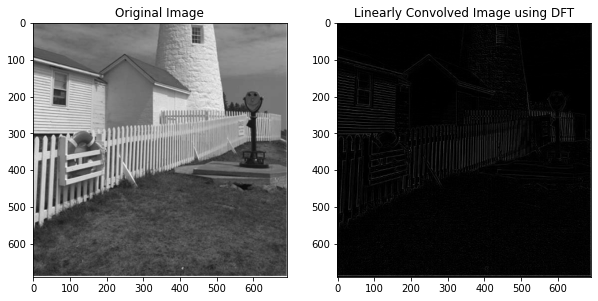

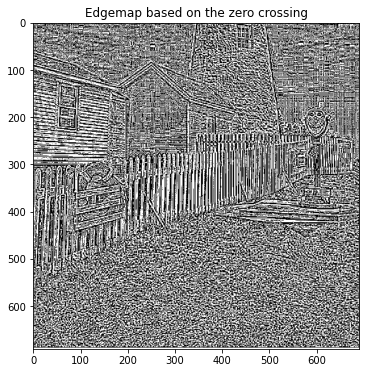

In [18]:
def LED(img,plot=True):
    L = np.array([[0,1,0],[1,-4,1],[0,1,0]])
    res = linearConvDFT(img,L,plot)
    #_,res = conv_oper().linear_conv_with_DFT(img,L)
    edgemap = np.zeros(img.shape)
    edgemap[res==0]=1
    if plot:
        plt.figure(figsize=(10,6))
        plt.imshow(edgemap,cmap="gray")
        plt.title("Edgemap based on the zero crossing")
        plt.show()
    return res,edgemap
R,L = LED(img.I)



In [21]:
print(R)

print(np.amin(R))

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  5.  0. ...  2. 61.  0.]
 [ 0.  0.  3. ...  0. 71.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
0.0


In [20]:
print(M)

[[  0. 114. 113. ... 135. 136. 138.]
 [114. 231. 115. ... 131. 131.  64.]
 [112. 110.   5. ...   1.   2.  61.]
 ...
 [ 70.  58. 137. ... 153. 158. 263.]
 [209. 303.  96. ...  94.  98.  62.]
 [255. 301.  47. ...  47.  47.  48.]]
